# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 28 (Friday) 11:00 pm </b> </font>

<font color="blue"> Jimmy Nguyen</font>

# I. Introduction

In this assignment, I will apply the pocket algorithm and logistic regression classification models using the data I provide. This assignment will test the accuracy of the predictions of future data, using my dataset. After the experiment, I will explain my findings and compare the two models.

# II. Data

This data set contains data based on many car samples with different varying characteristics that determine the overall quality of the vechicle. This data set has all possible combiniations of these characteristics.

In this data set, there are six parameters that factor into the evalutation: Price, maintenance cost, number of doors, passenger capacity, luggage boot size and safety rating. The value of the car is scored from unacceptable to very good.

In [909]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [910]:
df = pd.read_csv("car.data", names=["Buy", "Maint", "Doors", "Persons", "Lug_boot", "Safety", "Value"])
df

Buy  Maint  Doors Persons Lug_boot Safety  Value
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
5     vhigh  vhigh      2       2      med   high  unacc
6     vhigh  vhigh      2       2      big    low  unacc
7     vhigh  vhigh      2       2      big    med  unacc
8     vhigh  vhigh      2       2      big   high  unacc
9     vhigh  vhigh      2       4    small    low  unacc
10    vhigh  vhigh      2       4    small    med  unacc
11    vhigh  vhigh      2       4    small   high  unacc
12    vhigh  vhigh      2       4      med    low  unacc
13    vhigh  vhigh      2       4      med    med  unacc
14    vhigh  vhigh      2       4      med   high  unacc
15    vhigh  vhigh      2       4      big    low  unacc
16    vhigh  vhigh      2       4      big    med  unacc
17    vhigh  vhigh      2       4      big   high  unacc
18    vhigh  vhigh      2    more    small    low  unacc
19    vhigh  vhigh      2    more    small    med  unacc
20    vhigh  vhigh      2    more    small   high  unacc
21    vhigh  vhigh      2    more      med    low  unacc
22    vhigh  vhigh      2    more      med    med  unacc
23    vhigh  vhigh      2    more      med   high  unacc
24    vhigh  vhigh      2    more      big    low  unacc
25    vhigh  vhigh      2    more      big    med  unacc
26    vhigh  vhigh      2    more      big   high  unacc
27    vhigh  vhigh      3       2    small    low  unacc
28    vhigh  vhigh      3       2    small    med  unacc
29    vhigh  vhigh      3       2    small   high  unacc
...     ...    ...    ...     ...      ...    ...    ...
1698    low    low      4    more      big    low  unacc
1699    low    low      4    more      big    med   good
1700    low    low      4    more      big   high  vgood
1701    low    low  5more       2    small    low  unacc
1702    low    low  5more       2    small    med  unacc
1703    low    low  5more       2    small   high  unacc
1704    low    low  5more       2      med    low  unacc
1705    low    low  5more       2      med    med  unacc
1706    low    low  5more       2      med   high  unacc
1707    low    low  5more       2      big    low  unacc
1708    low    low  5more       2      big    med  unacc
1709    low    low  5more       2      big   high  unacc
1710    low    low  5more       4    small    low  unacc
1711    low    low  5more       4    small    med    acc
1712    low    low  5more       4    small   high   good
1713    low    low  5more       4      med    low  unacc
1714    low    low  5more       4      med    med   good
1715    low    low  5more       4      med   high  vgood
1716    low    low  5more       4      big    low  unacc
1717    low    low  5more       4      big    med   good
1718    low    low  5more       4      big   high  vgood
1719    low    low  5more    more    small    low  unacc
1720    low    low  5more    more    small    med    acc
1721    low    low  5more    more    small   high   good
1722    low    low  5more    more      med    low  unacc
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]

In [911]:
#"Buy", "Maint", "Doors", "Persons", "Lug_boot", "Safety", "Value"

#conversion
buyDic = {'low': 1, 'med':2, 'high':3, 'vhigh':4}
maintDic = {'low': 1, 'med':2, 'high':3, 'vhigh':4}
doorDic = {'2': 2, '3': 3, '4': 4, '5more': 5}
personDic = {'2': 2, '4': 4, 'more': 5}
lugDic = {'small': 1, 'med': 2, 'big': 3}
safeDic = {'low': 1, 'med': 2, 'high': 3}
valueDic = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

def buy_conv(s):
    return buyDic[s]
def maint_conv(s):
    return maintDic[s]
def door_conv(s):
    return doorDic[s]
def person_conv(s):
    return personDic[s]
def lug_conv(s):
    return lugDic[s]
def safe_conv(s):
    return safeDic[s]
def value_conv(s):
    return valueDic[s]

df['Buy'] = df['Buy'].apply(buy_conv)
df['Maint'] = df['Maint'].apply(maint_conv)
df['Doors'] = df['Doors'].apply(door_conv)
df['Persons'] = df['Persons'].apply(person_conv)
df['Lug_boot'] = df['Lug_boot'].apply(lug_conv)
df['Safety'] = df['Safety'].apply(safe_conv)
df['Value'] = df['Value'].apply(value_conv)

Buy                                            Doors      ...   \
        count mean       std  min   25%  50%   75%  max  count mean ...    
Safety                                                              ...    
1       576.0  2.5  1.119006  1.0  1.75  2.5  3.25  4.0  576.0  3.5 ...    
2       576.0  2.5  1.119006  1.0  1.75  2.5  3.25  4.0  576.0  3.5 ...    
3       576.0  2.5  1.119006  1.0  1.75  2.5  3.25  4.0  576.0  3.5 ...    

       Persons       Value                                               
           75%  max  count      mean       std  min  25%  50%  75%  max  
Safety                                                                   
1          5.0  5.0  576.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2          5.0  5.0  576.0  0.447917  0.619168  0.0  0.0  0.0  1.0  2.0  
3          5.0  5.0  576.0  0.796875  0.971985  0.0  0.0  1.0  1.0  3.0  

[3 rows x 48 columns]

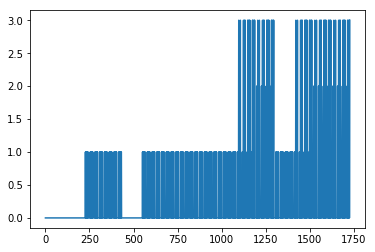

In [912]:
plt.plot('Value', data = df)

group_by_safety = df.groupby(by='Safety')
group_by_safety.describe()

# Preliminary Observation

This graph represents the overall quality of the car based on the data of over 1750 samples. Based on the unique samples, many of the acceptable cars tend to have low purchase price and low maintenance. The sample cars are classified by many things that people would consider when purchasing a car. The trends to go for more seating and safety. Many of the later samples are acceptable, and tend to be very similar in terms of build.

# III. Method

* Summarize the pocket algorithm and logistic regression.
* The superclass *Classifier* defines common utility methods. 
* Finish the normalize function for you. 
* Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the *two* classification models 
 - your implementation and description


# Pocket Algorithm

This model is a variation of the perceptron algorithm, that takes many of the core concepts on the perceptron algorithm and adds an additional variable that keeps track of the best weight until it goes through the entire algorithm.

# Logistic Regression

This model purpose is to directly predict ${P(T = k | X)}$ in the linear regression model. The model uses the softmax function to also generalize the logistic sigmoid function.

# Explanation of Code

The two classes BaseModel and Classifier are used as the blueprint for the classification models that I will be using. 

The pocket algorithm class contains the methods: compare(), train(), and use(). compare() is used to compare the current weight and the best weight. The method will return 1 or -1 based on the comparison of the weight (1 if the weight is better, -1 if worse). train() will train and update the weight being used. use() will return ${X1 * w}$

The logistic regression class contains the methods: softmax(), g(), train(), and use(). softmax() is used to generalize the logistic sigmoid function using X and the weight. g() is used as the wrapper for softmax(). train() is used to train the weight and update it each time. use() is used to return ${X1 * w}$ inside g().

### A. Super Classs Definition

In [913]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        # store the mean and std from the training set
        # when you learned mean & std, we do not update for test
        if self.meanX is None:
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        """ Utility to assure the input matrix mat is 2D. 
            If not, it throws an exception. 
            
            mat     ndarray
                    input matrix to check the shape
            name    string
                    matrix name to print out error
        """
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [914]:
# Reinitialize data partitions and covert targets to binary.
# This ensures that rerunning this cell at any point will work.
class PocketAlg(Classifier):
    
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        y_correct =  np.sum(y.flatten() == T.flatten())
        yp_correct = np.sum(yp.flatten() == T.flatten())
        return 1 if y_correct >= yp_correct else -1

    def train(self, X, T):
        
        init_data()
        
        epcohs = 1000 # Max number passes to make over the data
        alpha = 0.1 # Learning-rate

        Ntrain = Xtrain.shape[0] # Number of rows in Xtrain
        Dtrain = Xtrain.shape[1] # Number of columns in Xtrain

        # Adds bias to Xtrain
        X1train = np.hstack((np.ones((Ntrain, 1)), Xtrain.reshape((Ntrain, -1))))

        # Randomly initialize weights and pocket weights
        w = np.random.random(Dtrain+1)
        w_pocket = copy(w) # Copy initial weights

        for i in range(epcohs):
            converged = True
            for k in range(Ntrain):
                y = w @ X1train[k]
        
                if np.sign(y) != np.sign(Ttrain[k]):
                    w += alpha * Ttrain[k] * X1train[k]
                    converged = False
            
                    if compare(X=X1train, T=Ttrain, w=w, wp=w_pocket) > 0:
                        w_pocket[:] = w[:]  
                        # OR the less memory efficient way
                        # w_pocket = copy(w)
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        y = X1train @ w_pocket
        
        return w_pocket
        
    def use (self, X, w):
        X1 = self.add_ones(X)
        return X1 @ w

### E. Logistic Regression

In [915]:
class LogReg(Classifier):
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # Wrapper for softmax
    def g(self, X, w):
        return self.softmax(X @ w)

    def train(self, X, T):
        
        # Set shape parameters
        Ntrain, D = Xtrain.shape
        Ntest = Xtest.shape[0]
        K = Titrain.shape[1]

        # initialize the weight matrix
        w = np.random.rand(D+1, K)

        # iterate to update weights
        niter = 1000
        alpha = 0.1

        # Add bias to data
        X1train = np.hstack((np.ones((Ntrain, 1)), Xtrain))

        likeli = []
        for step in range(niter):
            ys = self.g(X1train, w)
            w = w + alpha * X1train.T @ (Titrain - ys)
    
        return w
    
    def use(self, X, W):
        X1 = self.add_ones(X)
        return self.g(X1, W)

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

# Discussion about Evaluation Metrics

I will measure the accuracy of the pocket algorithm and the logistic regression model by checking the predictions based on if they were correct based on the used data set.

# Discussion about Train and Test Accuracies

Based the results of the pocket algorithm, both the train and test accuracies were similar at ~90% accuracy. Looking at the graphs, the algorithm is designed to narrow the prediction to predict if the sample is acceptable or not, not specifially if they were very good or only acceptable.

Based on the results of the logistic regression mode, the accuracies of train and test were about the same at ~80%. This model is more specific on the prediction of the evaluation of the car, scoring from unacceptable to very good. According to the graph, this model tends to underestimate the evaluation of the car sample.

# Pocket Algorithm

In [916]:
pa = PocketAlg()

T = df.loc[:, 'Value'].copy()
X = df.iloc[:, : - 1].copy()

X = X.values
T = T.values

X = pa.normalize(X)

In [917]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    # Checks to make sure ratio sums to 1
    assert(np.sum(ratio) == 1)
    
    # Store the number of data samples 
    N = X.shape[0]

    # change the 1d array to 2d if need
    if len(T.shape) == 1:
        T = T.reshape((N,1))
    
    # Shuffle the data indices 
    idxs = np.random.permutation(N)
        
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
         # Number of rows that corresponds to kth element in ratios
        nrows = int(round(N * r)) 
        
        # print (i, nrows)
        # If we are on the last ratio simply use the remaining data samples
        if k == len(ratio)-1:
            Xs.append(X[idxs[i:], :])
            Ts.append(T[idxs[i:], :])
        else:
            Xs.append(X[idxs[i:i+nrows], :])
            Ts.append(T[idxs[i:i+nrows], :])
        
        i += nrows
    
    return Xs, Ts

In [918]:
def partition_data():
    """Partition data into train and test splits."""
    global Xtrain, Xtest, Ttrain, Ttest
    data, targets = partition(copy(X), copy(T))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    
def convert_targets():
    """ Convert partitioned targets to binary targets formatted for the perceptron algorithm."""
    global Xtrain, Xtest, Ttrain, Ttest
    Ttrain[Ttrain >= 1] = 1
    
    Ttrain[Ttrain < 1] = -1
    
    Ttest[Ttest >= 1] = 1
    
    Ttest[Ttest < 1] = -1

In [919]:
partition_data() # Reinitialize partitions
convert_targets() # Convert partition targets to be binary
print("Training targets: {}".format(np.unique(Ttrain)))
print("Test targets: {}".format(np.unique(Ttest)))

Training targets: [-1  1]
Test targets: [-1  1]


In [920]:
def init_data():
    partition_data()
    convert_targets()

In [921]:
w = pa.train(Xtrain, Ttrain)

End of training:  999


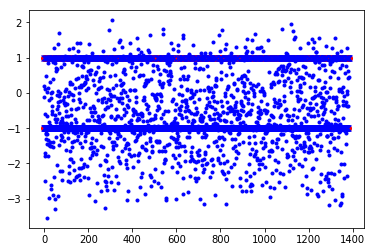

In [922]:
plt.plot(Ttrain, 'ro')

y = pa.use(Xtrain, w)
y_clipped = np.sign(y)
plt.plot(y, 'b.')
plt.plot(y_clipped, 'bx')

In [923]:
ytrain_pocket = np.sign(y)
acc = np.sum(ytrain_pocket.flatten()==Ttrain.flatten()) / Xtrain.shape[0]
print("Train accuracy is: {}%".format(acc*100))

Train accuracy is: 89.07380607814761%


In [924]:
# Set number of data samples in Xtest
Ntest = Xtest.shape[0]

# Add bias to Xtest
#bias = np.ones((Ntest, 1))
#X1test = np.hstack([bias, Xtest])
X1test = pa.add_ones(Xtest)

# Compute and clip predictions to get predicted classes
ytest_pocket = np.sign(X1test @ w)



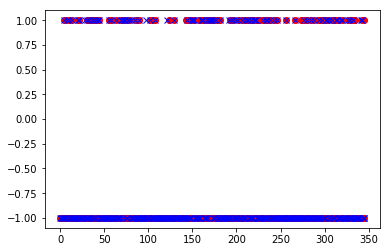

In [925]:
plt.plot(Ttest, 'ro')
plt.plot(ytest_pocket, 'bx')

In [926]:
# Compute accuracy
test_acc_pocket = np.sum(ytest_pocket.flatten()==Ttest.flatten()) / Ntest
print("Test accuracy is: {}%".format(test_acc_pocket*100))

Test accuracy is: 89.30635838150289%


# Logistic Regression

In [927]:
lr = LogReg()
partition_data()

In [928]:
def convert_to_indicators():
    global Titrain, Titest
    # TODO (1)
    Titrain = (Ttrain == np.unique(Ttrain)).astype(int)
    # TODO (2)
    Titest = (Ttest == np.unique(Ttest)).astype(int)

In [929]:
convert_to_indicators()

w = lr.train(Xtrain, Titrain)

In [930]:
# Get class probabilities for each sample in X1train
Ytrain = lr.use(Xtrain, w)

# Add bias to test data
X1test = np.hstack((np.ones((Ntest,1)), Xtest))
# Get class probabilities for each sample in X1test
Ytest = lr.g(X1test, w)

print(Ytrain)
print(Ytest)

print(Ytrain.shape)

[[3.85625112e-057 4.47929763e-037 9.54669364e-001 4.53306365e-002]
 [1.00000000e+000 3.56850398e-052 3.73490357e-090 5.74672557e-132]
 [1.00000000e+000 4.83473847e-052 2.48168733e-120 5.98390800e-157]
 ...
 [2.22380387e-033 1.18403044e-029 1.00000000e+000 2.04015586e-022]
 [1.00000000e+000 7.84678386e-016 6.17895872e-026 1.28282197e-049]
 [1.00000000e+000 1.01703898e-037 2.32477736e-142 1.75662245e-140]]
[[7.90032055e-055 9.38030831e-042 1.00000000e+000 3.04644186e-015]
 [1.00000000e+000 1.94989457e-025 1.43162936e-062 1.04594050e-096]
 [9.99999371e-001 6.28998006e-007 1.50615734e-042 7.78529567e-041]
 ...
 [9.70613511e-019 2.96736586e-016 1.00000000e+000 7.05854509e-017]
 [1.00000000e+000 1.85336574e-022 2.17172995e-109 6.99813776e-109]
 [9.99999993e-001 6.55410148e-009 1.99317890e-020 1.83338277e-026]]
(1382, 4)


In [931]:
Ltrain = np.argmax(Ytrain, axis=1)
print(Ltrain.shape)
print(Ttrain.shape)

(1382,)
(1382, 1)


In [932]:
Ltest = np.argmax(Ytest, axis = 1)
Ltest 

array([2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0,

In [933]:
plt.plot(Ttrain, 'ro')
plt.plot(Ltrain, 'bx')
plt.title("Training results")

Text(0.5, 1.0, 'Training results')

In [934]:
def print_accuracy(y, t, name):
    N = y.shape[0]
    n_correct = np.sum(y.flat == t.flat)
    n_correct_percent =  (n_correct / N) * 100
    print("{} accyracy:\t{}/{}\t{} %".format(name, n_correct, N, n_correct_percent))

In [935]:
print_accuracy(Ltrain, Ttrain, "Train")
print_accuracy(Ltest, Ttest, "Test")

Train accyracy:	1076/1382	77.85817655571635 %
Test accyracy:	278/346	80.34682080924856 %


# Discussion about Classification model comparisions

After applying both the pocket algorithm and logistic regression models, I discovered that the pocket algorithm tend to have better predictions while the logistic regression model will lag behind. While The logistic regression model is more specific when it comes to the predictions, the pocket algorithm did 10% better overall. Both algorithms stuggled to predict as they tend to underestimate the value of each sample. 

# Conclusions

I found this assignment very challenging as I ran to many errors that weren't very obvious for me to fix. Before, many of the accuracies were either 0 or very small, and eventually they are now closer to 100%. This assignment helped me better understand these two models while it was a frustrating process. I believe that the pocket algorithm model is better suited for my data set because of its overall better accuracy.

# References

Car evaulation data: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Linear classifcation notes provided on canvas, by Minwoo Jake Lee
https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs4156/notebooks/notes/Note-Linear%20Classification.ipynb

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)